In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.special import erfcinv as erfcinv
plt.rcParams['animation.html'] = 'html5'

# 2D Advection Equation

In [13]:
nx = 51
ny = 51
Lx = 1.0
Ly = 1.0
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
# dxy=100
# x = np.mgrid[-2500:2500+dxy:dxy]
# y = x
dx = Lx/(nx-1)
dy = Ly/(ny-1)
xx, yy = np.meshgrid(x, y)

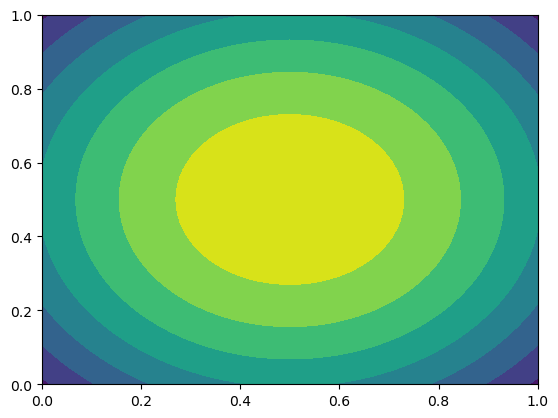

In [14]:
# ω0 = 2.0*np.pi
ω0 = -np.pi
# u0 = lambda x, y: np.sin(ω0*x) * np.cos(ω0*y)
u0 = lambda x, y: 1/np.sqrt(2*np.pi) * np.exp(-1/2 * (x-0.5)**2) * 1/np.sqrt(2*np.pi) * np.exp(-1/2 * (y-0.5)**2)
# plotting the initial conditions
plt.contourf(xx, yy, u0(xx, yy))

In [4]:
cx = 1.0
cy = 1.0

dt = 0.001
tend = 2.0
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup initial condition
sol = []
u = np.zeros([nx+2, ny+2])
u[1:-1, 1:-1] = u0(xx, yy)
# set periodic boundaries

u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [5]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1, 1:-1] = un[1:-1, 1:-1] - cflx * (un[1:-1, 1:-1] - un[1:-1, :-2]) - cfly * (un[1:-1, 1:-1] - un[:-2,1:-1])
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face
    unew[-1] = unew[2]
    unew[0] = unew[-3]
    sol.append(unew)
    t += dt

In [6]:
new_sol = []
for solution in sol:
    new_sol.append(solution[1:-1, 1:-1])

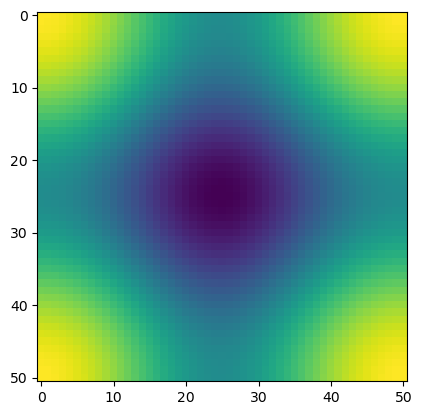

In [7]:
plt.imshow(new_sol[1500])

# Trying to make the solution look like what we have in Gaussian Plume Practical

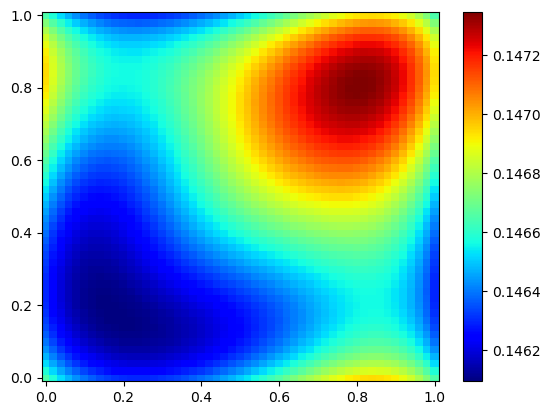

In [16]:
plt.pcolor(x, y, np.mean(new_sol, axis=0), cmap='jet')
plt.colorbar()